In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df_train=pd.read_csv('./data/titanic_train.csv')
df_test=pd.read_csv('./data/titanic_test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


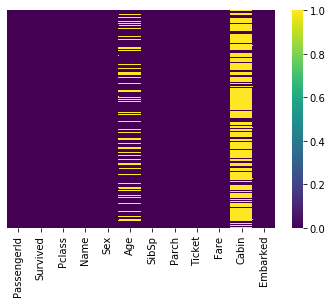

In [4]:
sns.heatmap(df_train.isnull(),cmap='viridis',yticklabels=False)

In [5]:
df_train.drop('Cabin',axis=1,inplace=True)

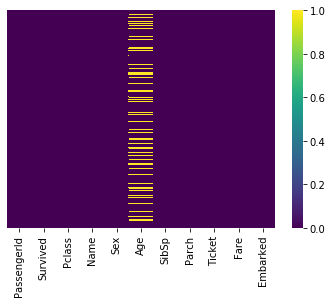

In [6]:
sns.heatmap(df_train.isnull(),cmap='viridis',yticklabels=False)

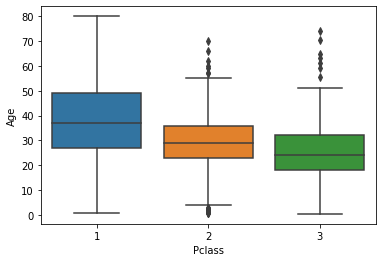

In [7]:
sns.boxplot(df_train['Pclass'],df_train['Age'])

In [8]:
#one way to fill the missing values with the avg value of age of passengers
#from the above plot it can be seen class 1 contains older people and class 3 contains the youngest one
#hence there are three age grps
#so smarter way is to take the avg class wise

In [9]:
#avg age of class1=37,class2=29,class3=24
def impute_age(x):
    c=x[0]
    age=x[1]
    
    if pd.isnull(age):
        if (c==1):
            age=37
        elif(c==2):
            age=29
        elif(c==3):
            age=24
        
        
    return age

In [10]:
df_train['Age']=df_train[['Pclass','Age']].apply(impute_age,axis=1)

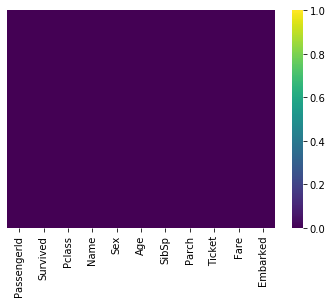

In [11]:
sns.heatmap(df_train.isnull(),cmap='viridis',yticklabels=False)

In [12]:
#now we have to conver our categorical features into dummy variables
#otherwise, our machine learning algo won't be able to take those features directly as i/p

#e.g. sex column have a data of male or female
#we have to create a new column containg a data of form 'o' nd '1' representing male or female
#i.e. encoding the info in a way so that machine learning algo can understand

In [13]:
pd.get_dummies(df_train['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [14]:
#as we can see one column is perfectpredictor of other
#if female =0 this means 'not female' =>> its 'male' hence male=1
pd.get_dummies(df_train['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [15]:
sex=pd.get_dummies(df_train['Sex'],drop_first=True)
embark=pd.get_dummies(df_train['Embarked'])

In [16]:
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [17]:
df_train=pd.concat([df_train,sex,embark],axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1


In [18]:
df_train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [19]:
df_train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [20]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [21]:
x=df_train.drop('Survived',axis=1)
y=df_train['Survived']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/mnt/d/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# predictions

In [24]:
pred=log_reg.predict(x_test)

In [25]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       170
           1       0.71      0.81      0.76        98

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.82      0.81      0.81       268



In [26]:
print(confusion_matrix(pred,y_test))

[[138  32]
 [ 19  79]]


# accuracy

In [27]:
accuracy_score(pred,y_test)

0.8097014925373134